# 4.9. Regularyzacja typu Lasso i Ridge

Za wszelką cenę musimy uniknąć sytuacji przeuczenia modelu. Chcemy stworzyć rozwiązanie, które będzie w stanie dobrze generalizować, a nie rozpoznawać przykłady, które już znamy. W podstawowym modelu regresji liniowej istnieje ryzyko, że algorytm zbyt dobrze dopasuje się do szumu jaki znajduje się w danych i przez to straci zdolność do rozpoznawania innych przypadków. Regularyzacja jest jedną z metod, która pozwala na ograniczenie wartości parametrów modelu i dodatkowo pozwala w niektórych przypadkach pozbyć się nadmiarowych zmiennych.

## Regularyzacja Lasso (L1)

W dwuwymiarowej regresji liniowej staramy się zoptymalizować następująca formułę:

$$ RSS = \sum _{i=1}^{N}\varepsilon _{i}^{2} = \sum _{i=1}^{N}(\overline{y_{i}}-( a x_{i} + b))^{2} = \sum _{i=1}^{N}(\overline{y_{i}}- b - a x_{i})^{2} $$

Chcielibyśmy niejako zmusić algorytm do preferowania jak najniższej wagi dla zmiennej niezależnej (tj. $ a $). W regresji Lasso dodajemy więc jej wartość absolutną, dzięki czemu model będzie starał się przy okazji minimalizowania błędu, zmniejszyć także absolutną wartość wagi. Zapiszmy jednak wyraz wolny oraz wagi zmiennych w postaci wektora $ \beta = (\beta_{0}, \beta_{1}) $, gdzie $ \beta_{0} $ odpowiada oryginalnej wartości $ b $. W P-wymiarowym przypadku zapiszemy wektor wag jako $ \beta = (\beta_{0}, \beta_{1}, \beta_{2}, ..., \beta_{P}) $

$$ \sum _{i=1}^{N}\varepsilon _{i}^{2} + \alpha \sum_{j=1}^{P}{ |\beta_{j}| } = \sum _{i=1}^{N}(\overline{y_{i}} - \beta_{0} - \sum_{j=1}^{P}{ \beta_{j} x_{ij} })^{2} + \alpha \sum_{j=1}^{P}{ |\beta_{j}| } = RSS + \alpha \sum_{j=1}^{P}{ |\beta_{j}| } $$

$ \lVert \beta \lVert_{1} $ to norma $ L1 $, od której bierze nazwę sama metoda regularyzacji. Może być ona rozumiana jako długość wektora i obliczamy ją za pomocą:

$$ \lVert \beta \lVert_{1} = \sum_{}^{}{|\beta_{i}|} $$

Parametr $ \alpha $ dobiera się eksperymentalnie i na im większą wartość go ustawimy, tym mniejsze będą wagi zmiennych, ponieważ suma ich wartości absolutnych będzie coraz bardziej wpływać na wynik całego wyrażenia.

Powrócimy na chwilę do przykładu w dwóch wymiarach. Będzie nam łatwiej zwizualizować jak regularyzacja wpływa na stworzoną prostą.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
def draw_line(a, b, x_min=-5, x_max=5, 
              c=(.75, .1, .1, .25)):
    x = np.linspace(x_min, x_max, 1000)
    y = a * x + b
    plt.plot(x, y, "-r", c=c)

In [9]:
xy_df = pd.DataFrame({
    "x": [1, -2, 2, -1, 0],
    "y": [2, -1, 2.5, 0, 1.5],
})

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()
lr.fit(xy_df[["x"]], xy_df["y"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

(array([0.9]), 1.0)

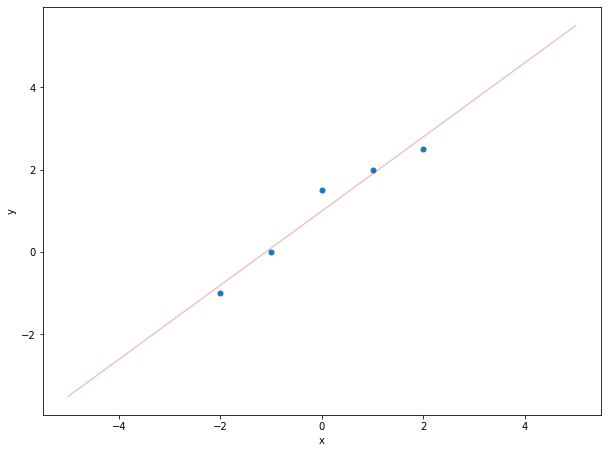

In [21]:
xy_df.plot.scatter(x="x", y="y", s=25,
                   figsize=(10.0, 7.5))
draw_line(lr.coef_[0], lr.intercept_)
lr.coef_, lr.intercept_

In [13]:
from sklearn.linear_model import Lasso

In [14]:
lasso = Lasso(alpha=1.0)
lasso.fit(xy_df[["x"]], xy_df["y"])

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

(array([0.4]), 1.0)

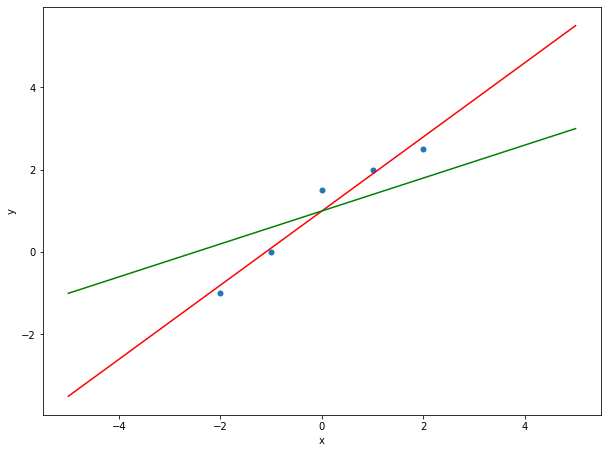

In [22]:
xy_df.plot.scatter(x="x", y="y", s=25,
                   figsize=(10.0, 7.5))
draw_line(lr.coef_[0], lr.intercept_, c="red")
draw_line(lasso.coef_[0], lasso.intercept_, c="green")
lasso.coef_, lasso.intercept_

## Regularyzacja Ridge'a (L2)

Regularyzacja L2 rózni się od L1 sposobem liczenia wpływu wag modelu na optymalizację. W przypadku regularyzacji Lasso używamy wartości absolutnej, a Ridge'a kwadratu wag. L2 promuje więc niejako wykorzystanie wag o wartości absolutnej mniejszej niż 1.

$$ \sum _{i=1}^{N}\varepsilon _{i}^{2} + \alpha \sum_{j=1}^{P}{ \beta_{j}^{2} } = \sum _{i=1}^{N}(\overline{y_{i}} - \beta_{0} - \sum_{j=1}^{P}{ \beta_{j} x_{ij} })^{2} + \alpha \sum_{j=1}^{P}{ \beta_{j}^{2} } = RSS + \alpha \sum_{j=1}^{P}{ \beta_{j}^{2} } $$

Oczywiście norma $ L2 $ jest obliczana w inny sposób niż $ L1 $, a mianowicie:

$$ \lVert \beta \lVert_{2} = \sum_{}^{}{\beta_{i}^{2}} $$

In [23]:
from sklearn.linear_model import Ridge

In [24]:
ridge = Ridge(alpha=1.0)
ridge.fit(xy_df[["x"]], xy_df["y"])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

(array([0.81818182]), 1.0)

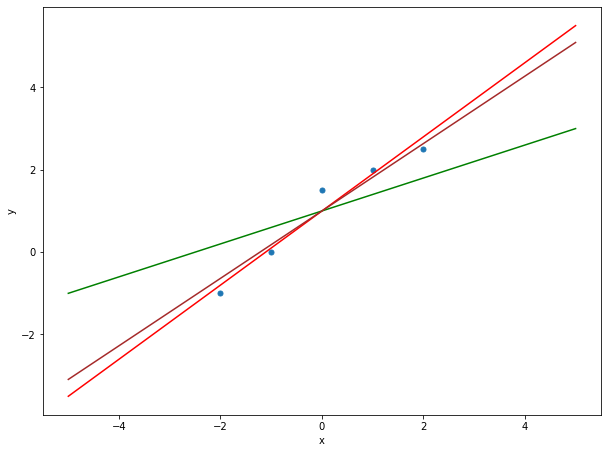

In [25]:
xy_df.plot.scatter(x="x", y="y", s=25,
                   figsize=(10.0, 7.5))
draw_line(lr.coef_[0], lr.intercept_, c="red")
draw_line(lasso.coef_[0], lasso.intercept_, c="green")
draw_line(ridge.coef_[0], ridge.intercept_, c="brown")
ridge.coef_, ridge.intercept_

**W obu przypadkach regularyzacji, musimy odpowiednio dobrać wartość parametru $ \alpha $!**

## Regularyzacja w wielu wymiarach

Powróćmy do przypadku predykcji jakości wina, tym razem z wykorzystaniem metod regularyzacji. 

In [28]:
wine_quality_df = pd.read_parquet("./data/wine-quality.parquet")
wine_quality_df.sample(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_red,color_white,bound sulfur dioxide
2263,6.9,0.30,0.21,15.7,0.056,49.0,159.0,0.99827,3.11,0.48,9.0,5,0,1,110.0
307,10.3,0.41,0.42,2.4,0.213,6.0,14.0,0.99940,3.19,0.62,9.5,6,1,0,8.0
817,10.8,0.29,0.42,1.6,0.084,19.0,27.0,0.99545,3.28,0.73,11.9,6,1,0,8.0
3870,6.1,0.23,0.27,9.8,0.055,74.0,134.0,0.99534,3.16,0.40,10.2,6,0,1,60.0
688,7.7,0.66,0.04,1.6,0.039,4.0,9.0,0.99620,3.40,0.47,9.4,5,1,0,5.0


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
train_df, test_df = train_test_split(wine_quality_df, test_size=0.2)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [32]:
lr_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression()),
])
lr_pipeline.fit(train_df.drop("quality", axis="columns"), 
                train_df["quality"])

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [44]:
lasso_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("regressor", Lasso(alpha=0.01)),
])
lasso_pipeline.fit(train_df.drop("quality", axis="columns"), 
                   train_df["quality"])

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('regressor',
                 Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

Jak widać, istnieje ryzyko, że nasze wagi zostaną wyzerowane. Dzięki temu upraszczamy model, bo część cech może zostać po prostu usunięta.

In [45]:
ridge_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("regressor", Ridge(alpha=0.01)),
])
ridge_pipeline.fit(train_df.drop("quality", axis="columns"), 
                   train_df["quality"])

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('regressor',
                 Ridge(alpha=0.01, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [46]:
weights_df = pd.DataFrame({
    "column_name": train_df.drop("quality", axis="columns").columns,
    "linear_regression": lr_pipeline.steps[1][1].coef_,
    "lasso": lasso_pipeline.steps[1][1].coef_,
    "ridge": ridge_pipeline.steps[1][1].coef_,
})
weights_df

,column_name,linear_regression,lasso,ridge
0,fixed acidity,0.100848,-0.000000,0.100841
1,volatile acidity,-0.244617,-0.221833,-0.244616
2,citric acid,-0.013010,-0.002043,-0.013010
3,residual sugar,0.287423,0.079970,0.287410
4,chlorides,-0.022311,-0.016411,-0.022312
5,free sulfur dioxide,0.063022,0.047425,0.063023
6,total sulfur dioxide,-0.017383,-0.000000,-0.017384
7,density,-0.303860,-0.000000,-0.303842
8,pH,0.080035,0.017150,0.080031
9,sulphates,0.102477,0.073578,0.102476
